In [1]:
import pandas as pd

# Load CSVs
customers = pd.read_csv("/content/customers.csv")
restaurants = pd.read_csv("/content/restaurants.csv")
partners = pd.read_csv("/content/delivery_partners.csv")
orders = pd.read_csv("/content/orders.csv")

# Quick look
print(customers.head())
print(restaurants.head())
print(partners.head())
print(orders.head())


  customer_id         name       phone                     email signup_date  \
0    CUST1000  Arnav Singh  9613427546  arnav.singh0@example.com  2021-01-31   
1    CUST1001   Maya Joshi  9646674928   maya.joshi1@example.com  2024-08-15   
2    CUST1002  Vidyut Iyer  9923206344  vidyut.iyer2@example.com  2018-04-19   
3    CUST1003   Tara Desai  9749352498   tara.desai3@example.com  2018-01-27   
4    CUST1004  Rohan Mehta  9780707823  rohan.mehta4@example.com  2019-02-23   

            address       city  postcode  loyalty_points  
0   63 Station Road  Bengaluru    882246             209  
1       109 MG Road     Mumbai    208246             447  
2  144 Station Road    Lucknow    549898             451  
3  195 Station Road       Pune    466778             569  
4         24 Sector      Delhi    486417             704  
  restaurant_id           name      cuisine  rating      address       city  \
0      REST3000    Bites Mehta      Chinese    4.50     193 Lane      Delhi   
1      

In [4]:
print(orders.columns)
print(restaurants.columns)
print(partners.columns)
print(customers.columns)

Index(['order_id', 'order_datetime', 'customer_id', 'restaurant_id',
       'partner_id', 'items_count', 'total_amount', 'payment_method',
       'order_status', 'estimated_delivery_mins', 'actual_delivery_mins',
       'delivery_distance_km', 'tip_amount'],
      dtype='object')
Index(['restaurant_id', 'name', 'cuisine', 'rating', 'address', 'city',
       'opening_time', 'closing_time', 'avg_cost_for_two'],
      dtype='object')
Index(['partner_id', 'name', 'vehicle_type', 'vehicle_no', 'phone', 'rating',
       'joined_date', 'active'],
      dtype='object')
Index(['customer_id', 'name', 'phone', 'email', 'signup_date', 'address',
       'city', 'postcode', 'loyalty_points'],
      dtype='object')


In [5]:
orders.rename(columns={
    "total_amount": "order_value",
    "order_status": "status",
    "actual_delivery_mins": "delivery_duration"
}, inplace=True)

restaurants.rename(columns={"name": "restaurant_name"}, inplace=True)
partners.rename(columns={"name": "partner_name"}, inplace=True)
customers.rename(columns={"name": "customer_name"}, inplace=True)

In [6]:
orders["order_datetime"] = pd.to_datetime(orders["order_datetime"])
partners["joined_date"] = pd.to_datetime(partners["joined_date"])
customers["signup_date"] = pd.to_datetime(customers["signup_date"])

In [7]:
df = (
    orders.merge(customers, on="customer_id", how="left")
          .merge(restaurants, on="restaurant_id", how="left")
          .merge(partners, on="partner_id", how="left")
)


In [8]:
print(df.head())
print(df.info())

    order_id      order_datetime customer_id restaurant_id partner_id  \
0  ORD500000 2023-01-16 00:15:00    CUST1393      REST3529     DP2442   
1  ORD500001 2023-01-05 16:45:00    CUST1395      REST3581     DP2176   
2  ORD500002 2023-01-10 03:28:00    CUST1588      REST3202     DP2154   
3  ORD500003 2023-01-03 23:18:00    CUST1498      REST3323     DP2543   
4  ORD500004 2023-01-03 05:00:00    CUST1066      REST3087     DP2021   

   items_count  order_value payment_method     status  \
0            2       424.21           Card  delivered   
1            3      1515.37            UPI  delivered   
2            4       561.88            UPI  delivered   
3            6       694.31           Card  delivered   
4            1        83.05           Card  delivered   

   estimated_delivery_mins  ...  opening_time  closing_time  avg_cost_for_two  \
0                       30  ...         11:00         22:00               592   
1                       39  ...          8:00         01

In [10]:
print("Avg Delivery Duration (mins):", df["delivery_duration"].mean())

top_restaurants = df.groupby("restaurant_name")["order_value"].sum().sort_values(ascending=False).head(5)
print(top_restaurants)

partner_perf = df.groupby("partner_name").agg({
    "order_id": "count",
    "delivery_duration": "mean",
    "tip_amount": "mean",

}).sort_values("order_id", ascending=False)
print(partner_perf.head())


Avg Delivery Duration (mins): 49.015
restaurant_name
Spice Chopra     65182.32
House Gupta      53148.14
Spice Rao        50283.87
Spice Saxena     48760.70
Corner Chopra    47434.89
Name: order_value, dtype: float64
                order_id  delivery_duration  tip_amount
partner_name                                           
Meera Malhotra        50          45.820000   30.800000
Kabir Iyer            48          48.229167   27.500000
Kavya Desai           48          49.604167   22.500000
Kabir Joshi           44          44.568182   24.318182
Anaya Gupta           43          51.744186   27.906977


<Axes: title={'center': 'Orders by Hour'}, xlabel='order_hour'>

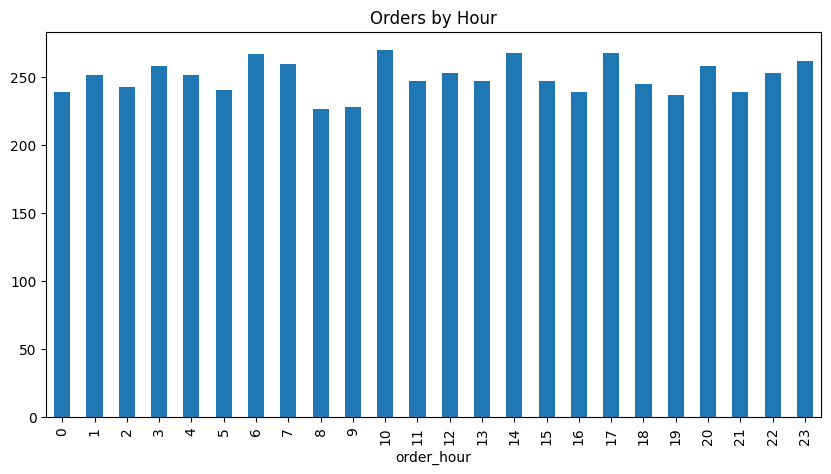

In [11]:
df["order_hour"] = df["order_datetime"].dt.hour
df["order_hour"].value_counts().sort_index().plot(kind="bar", figsize=(10,5), title="Orders by Hour")


In [12]:
# Merge Orders with Restaurants
orders_rest = orders.merge(restaurants, on="restaurant_id", how="left")

# Merge with Delivery Partners
orders_rest_partners = orders_rest.merge(partners, on="partner_id", how="left")

# Merge with Customers
master_df = orders_rest_partners.merge(customers, on="customer_id", how="left")

print(master_df.shape)
print(master_df.head(3))


(6000, 36)
    order_id      order_datetime customer_id restaurant_id partner_id  \
0  ORD500000 2023-01-16 00:15:00    CUST1393      REST3529     DP2442   
1  ORD500001 2023-01-05 16:45:00    CUST1395      REST3581     DP2176   
2  ORD500002 2023-01-10 03:28:00    CUST1588      REST3202     DP2154   

   items_count  order_value payment_method     status  \
0            2       424.21           Card  delivered   
1            3      1515.37            UPI  delivered   
2            4       561.88            UPI  delivered   

   estimated_delivery_mins  ...  joined_date  active  customer_name  \
0                       30  ...   2022-03-10    True     Saira Nair   
1                       39  ...   2022-04-14    True     Aarav Nair   
2                       31  ...   2023-03-12    True      Amit Khan   

      phone_y                      email  signup_date         address_y  \
0  9941182345  saira.nair393@example.com   2024-01-11  178 Station Road   
1  9673301517  aarav.nair395@exa

In [15]:
# Convert datetime
master_df['order_datetime'] = pd.to_datetime(master_df['order_datetime'])

# Extract hour, day, month
master_df['order_hour'] = master_df['order_datetime'].dt.hour
master_df['order_day'] = master_df['order_datetime'].dt.day_name()
master_df['order_month'] = master_df['order_datetime'].dt.month





In [17]:
print(master_df.columns)



Index(['order_id', 'order_datetime', 'customer_id', 'restaurant_id',
       'partner_id', 'items_count', 'order_value', 'payment_method', 'status',
       'estimated_delivery_mins', 'delivery_duration', 'delivery_distance_km',
       'tip_amount', 'restaurant_name', 'cuisine', 'rating_x', 'address_x',
       'city_x', 'opening_time', 'closing_time', 'avg_cost_for_two',
       'partner_name', 'vehicle_type', 'vehicle_no', 'phone_x', 'rating_y',
       'joined_date', 'active', 'customer_name', 'phone_y', 'email',
       'signup_date', 'address_y', 'city_y', 'postcode', 'loyalty_points',
       'order_hour', 'order_day', 'order_month'],
      dtype='object')


In [18]:
top_restaurants = (
    master_df.groupby("restaurant_name")['order_id']
    .count()
    .sort_values(ascending=False)
    .head(10)
)
print(top_restaurants)


restaurant_name
Spice Chopra     89
Corner Saxena    69
Corner Patel     69
House Gupta      67
Spice Kapoor     65
Dine Malhotra    63
House Bhatia     62
Hub Verma        61
House Nair       61
Kitchen Das      59
Name: order_id, dtype: int64


In [19]:
top_restaurants_revenue = (
    master_df.groupby("restaurant_name")['order_value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print(top_restaurants_revenue)


restaurant_name
Spice Chopra      65182.32
House Gupta       53148.14
Spice Rao         50283.87
Spice Saxena      48760.70
Corner Chopra     47434.89
Corner Rao        46637.26
Corner Saxena     45192.85
Cafe Chopra       44121.65
Hub Verma         43962.71
Kitchen Chopra    43345.84
Name: order_value, dtype: float64


In [20]:
partner_perf = (
    master_df.groupby("partner_name")
    .agg({
        "order_id": "count",
        "delivery_duration": "mean",
        "tip_amount": "mean",
        "rating_y": "mean"
    })
    .rename(columns={
        "order_id": "total_orders",
        "delivery_duration": "avg_delivery_time",
        "tip_amount": "avg_tip",
        "rating_y": "avg_partner_rating"
    })
    .sort_values("total_orders", ascending=False)
    .head(10)
)
print(partner_perf)


                total_orders  avg_delivery_time    avg_tip  avg_partner_rating
partner_name                                                                  
Meera Malhotra            50          45.820000  30.800000            4.630200
Kabir Iyer                48          48.229167  27.500000            4.624375
Kavya Desai               48          49.604167  22.500000            4.506875
Kabir Joshi               44          44.568182  24.318182            4.557727
Anaya Gupta               43          51.744186  27.906977            4.912558
Zoya Verma                42          51.000000  28.333333            4.536429
Shivansh Joshi            38          48.552632  31.315789            4.300789
Zoya Khan                 38          47.236842  24.210526            4.507895
Aniket Kapoor             37          46.702703  21.621622            4.687297
Rhea Malhotra             37          46.783784  23.243243            4.858919


In [21]:
top_customers = (
    master_df.groupby("customer_name")['order_id']
    .count()
    .sort_values(ascending=False)
    .head(10)
)
print(top_customers)


customer_name
Ishaan Gupta      55
Saira Mehta       49
Neha Joshi        46
Arjun Kapoor      44
Kavya Das         43
Vidyut Iyer       42
Anaya Singh       41
Kavya Malhotra    41
Tara Malhotra     41
Maya Jain         40
Name: order_id, dtype: int64


/tmp/ipython-input-4169097448.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette="viridis")


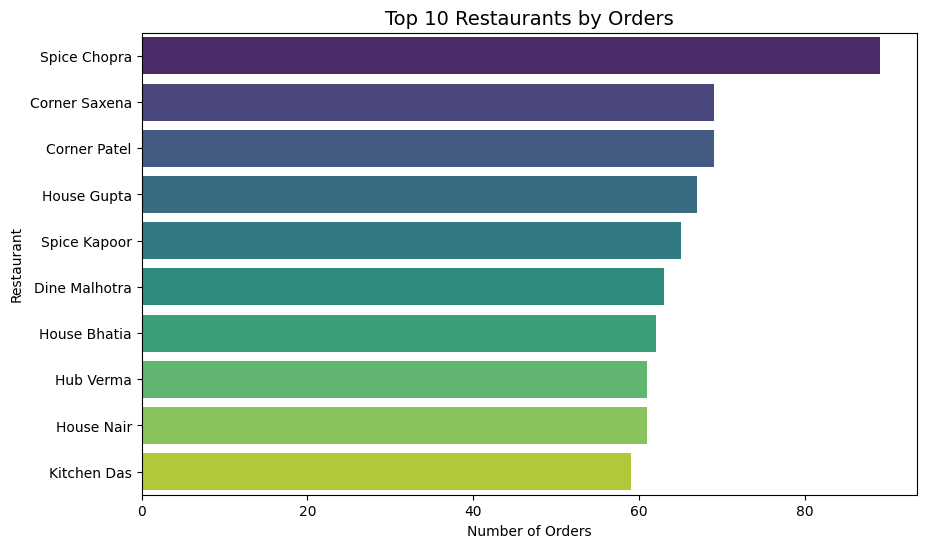

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

top_restaurants = (
    master_df.groupby("restaurant_name")['order_id']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette="viridis")
plt.title("Top 10 Restaurants by Orders", fontsize=14)
plt.xlabel("Number of Orders")
plt.ylabel("Restaurant")
plt.show()


/tmp/ipython-input-32623088.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_restaurants_revenue.values, y=top_restaurants_revenue.index, palette="magma")


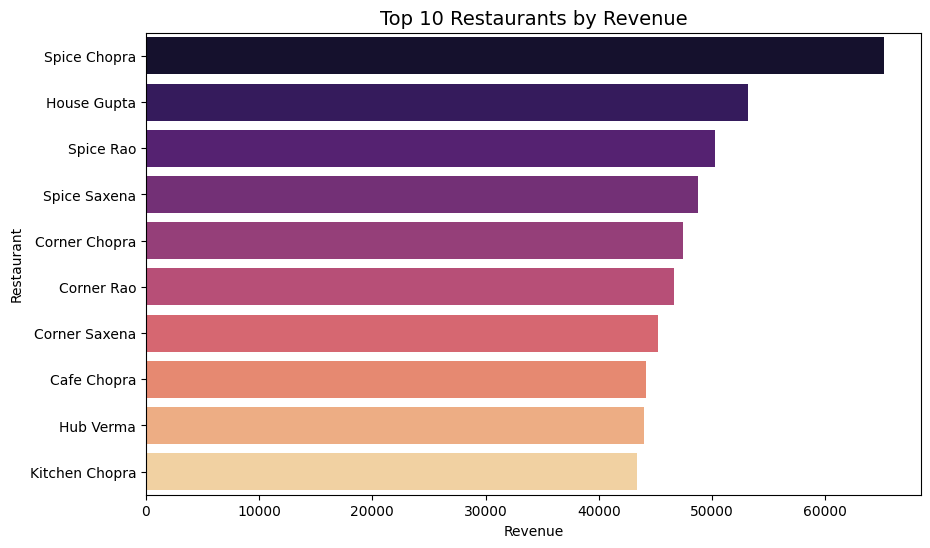

In [23]:
top_restaurants_revenue = (
    master_df.groupby("restaurant_name")['order_value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top_restaurants_revenue.values, y=top_restaurants_revenue.index, palette="magma")
plt.title("Top 10 Restaurants by Revenue", fontsize=14)
plt.xlabel("Revenue")
plt.ylabel("Restaurant")
plt.show()


/tmp/ipython-input-3332148264.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=partner_perf["total_orders"], y=partner_perf.index, palette="coolwarm")


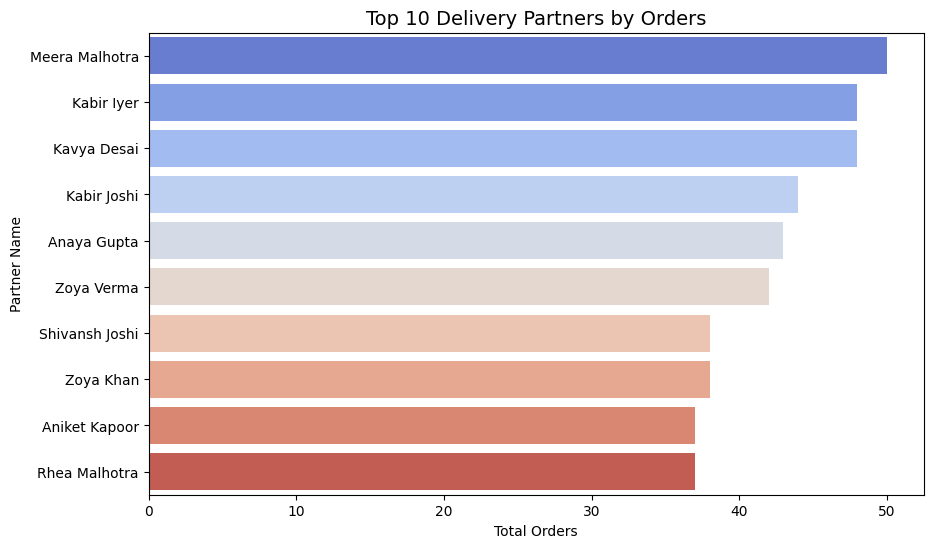

/tmp/ipython-input-3332148264.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=partner_perf["avg_delivery_time"], y=partner_perf.index, palette="Blues_r")


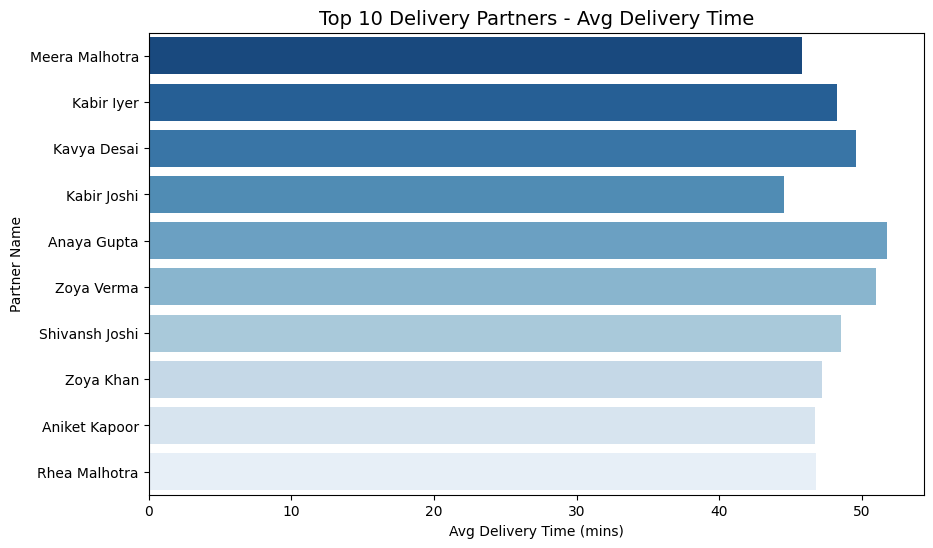

In [24]:
partner_perf = (
    master_df.groupby("partner_name")
    .agg({
        "order_id": "count",
        "delivery_duration": "mean"
    })
    .rename(columns={
        "order_id": "total_orders",
        "delivery_duration": "avg_delivery_time"
    })
    .sort_values("total_orders", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=partner_perf["total_orders"], y=partner_perf.index, palette="coolwarm")
plt.title("Top 10 Delivery Partners by Orders", fontsize=14)
plt.xlabel("Total Orders")
plt.ylabel("Partner Name")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=partner_perf["avg_delivery_time"], y=partner_perf.index, palette="Blues_r")
plt.title("Top 10 Delivery Partners - Avg Delivery Time", fontsize=14)
plt.xlabel("Avg Delivery Time (mins)")
plt.ylabel("Partner Name")
plt.show()


/tmp/ipython-input-1909692500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="order_hour", data=master_df, palette="plasma")


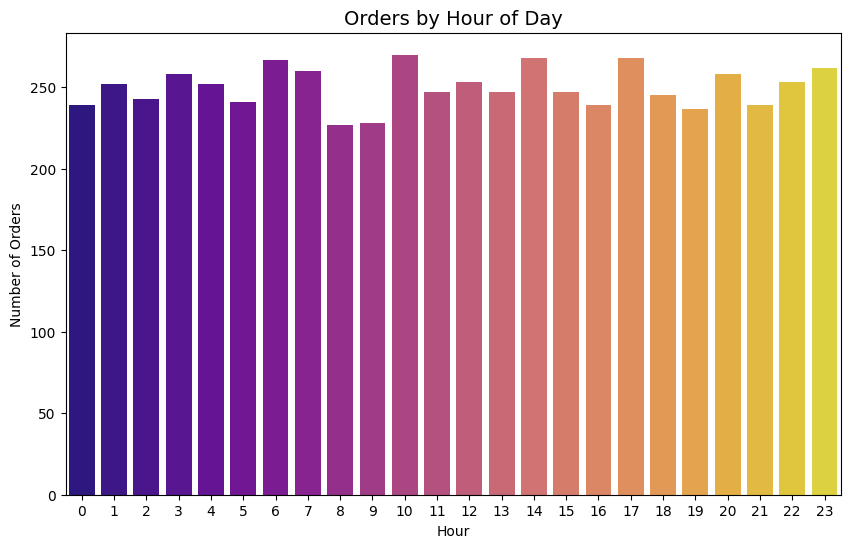

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x="order_hour", data=master_df, palette="plasma")
plt.title("Orders by Hour of Day", fontsize=14)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.show()


/tmp/ipython-input-1127166809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="order_day", data=master_df, order=sorted(master_df['order_day'].unique()), palette="Set2")


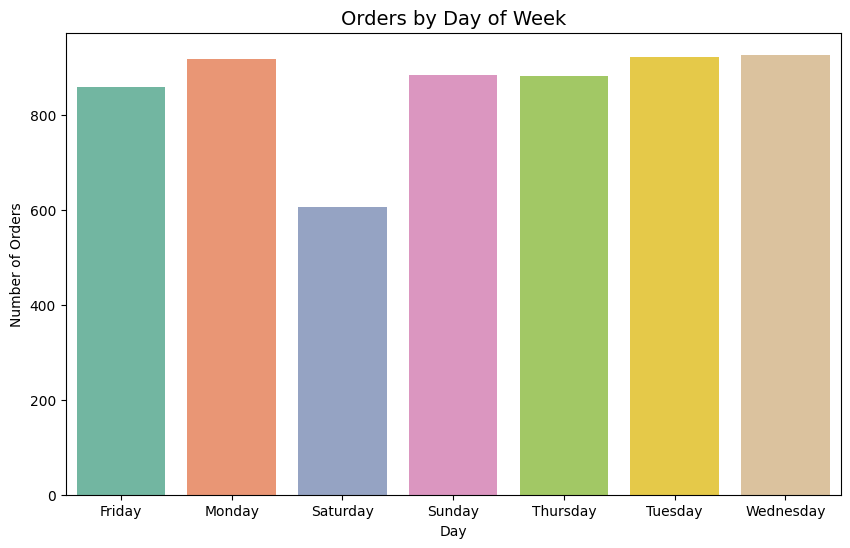

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x="order_day", data=master_df, order=sorted(master_df['order_day'].unique()), palette="Set2")
plt.title("Orders by Day of Week", fontsize=14)
plt.xlabel("Day")
plt.ylabel("Number of Orders")
plt.show()


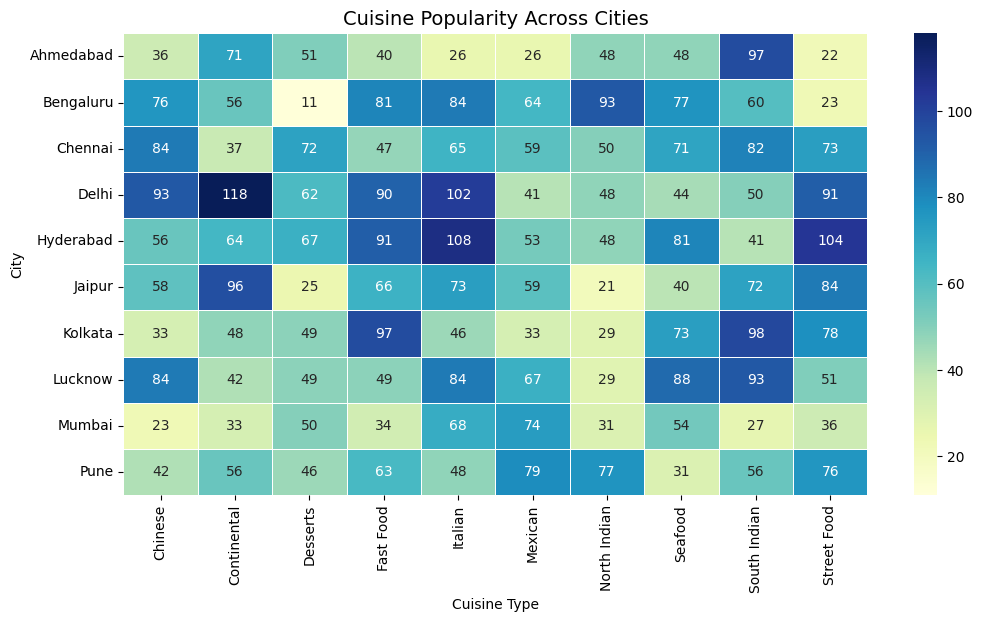

In [27]:
# Create a pivot table: count of orders by city & cuisine
city_cuisine = (
    master_df.groupby(["city_x", "cuisine"])['order_id']
    .count()
    .reset_index()
    .pivot(index="city_x", columns="cuisine", values="order_id")
    .fillna(0)
)

plt.figure(figsize=(12,6))
sns.heatmap(city_cuisine, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title("Cuisine Popularity Across Cities", fontsize=14)
plt.xlabel("Cuisine Type")
plt.ylabel("City")
plt.show()
